In [2]:
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import rcParams
plt.rcParams['xtick.labelsize']  = 18
plt.rcParams['ytick.labelsize']  = 18
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family']      = 'STIXGeneral'
plt.rcParams['axes.labelsize']   = 20
plt.rcParams['axes.titlesize']   = 20
plt.rcParams['font.size']        = 10
plt.rcParams['legend.fontsize']  = 20
plt.rcParams.update({'figure.autolayout': True})
#import scienceplots
#plt.style.use(['science','ieee'])

from tqdm import tqdm
import random
import os
import time
import h5py
from datetime import datetime


import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Conv2DTranspose

# Import auxiliary libraries

import auxLib; importlib.reload(auxLib)

Importing library...
Library successfully imported
Importing library...
Library successfully imported


<module 'auxLib' from 'd:\\Facultad\\Doctorado\\Proyectos\\paper\\auxLib.py'>

In this notebook we will use a different criteria to determine the critical temperature of the system. In this case we will use the value of the temperature at which the height of every curve is the half of the total height. We will explain what this means later.

# Main variables

In [14]:
L = 40

densities = [0.55, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.7, 0.8, 0.9, 1.0]

densities_str = ['055','06', '061', '062', '063', '064', '065', '07', '08', '09','1']

first_neurons = [i for i in range(1,11)]
middle_neurons = [20 * i for i in range(1,6)]
last_neurons = [50 * i for i in range(3,21)]

neurons = first_neurons + middle_neurons + last_neurons

seed = 15

callbacks = auxLib.myCallback() # to be able to stop training if accuracy is high enough

# we will get the results from results folder

modelsfolder, resultsfolder = auxLib.folders(directory='2024-08-18') 

# Folder where results will be saved

saving_folder = os.path.join(os.getcwd(), 'predictions', 'Half_of_height', datetime.now().strftime('%Y-%m-%d'), 'training_all')

os.makedirs(saving_folder, exist_ok = True)


In [5]:
from scipy.optimize import curve_fit # We will use scipy to determine the critical temperature

# The method

We will load the predictions of 2024-08-18 and will calculate the temperature with them. To do so, I will make a copy of the predictions in our current directory ('resultsfolder') and then we will work with them.

Here is how

In [25]:
prediction = pd.read_csv(resultsfolder+f'/predictions_1.csv', header=0).to_numpy(float)

temperature, para, ferro, neel, stripe = prediction[1:].T

def linear_function(x, a, b):
    return a*x + b

index_temp_1 = np.where(temperature == 1)[0][0]

index_temp_3 = np.where(temperature == 3)[0][0]

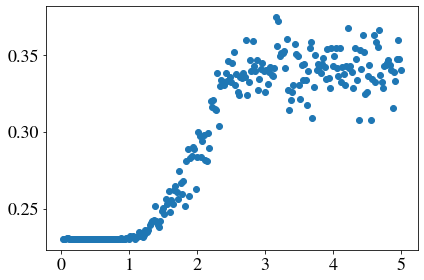

In [26]:
plt.scatter(temperature, para)

We make a linear fit on (0,1) and another linear fit on (3,5)

In [36]:
popt_first, pcov_first = curve_fit(linear_function, temperature[:index_temp_1+1], para[:index_temp_1+1])
popt_last, pcov_last = curve_fit(linear_function, temperature[index_temp_3:], para[index_temp_3:])

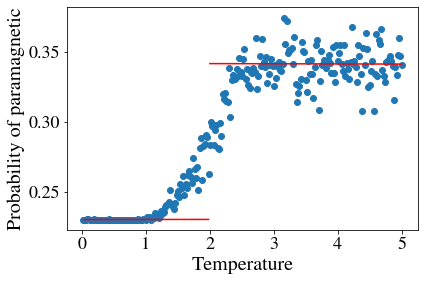

In [60]:
plt.scatter(temperature, para)

# Plot the first segment fit
plt.plot(temperature[:(np.where(temperature == 2)[0][0])], 
         linear_function(temperature[:(np.where(temperature == 2)[0][0])], *popt_first), color='red', label='First Segment Fit (Temp=1)')

# Plot the last segment fit
plt.plot(temperature[(np.where(temperature == 2)[0][0]):], 
         linear_function(temperature[(np.where(temperature == 2)[0][0]):], *popt_last), color='red', label='Last Segment Fit')

plt.xlabel('Temperature')
plt.ylabel('Probability of paramagnetic')

plt.show()

In [61]:
print(f'Lower bound: {popt_first[1]}')
print(f'Higher bound: {popt_last[1]}')

half_of_height = (popt_first[1]+popt_last[1])/2

closest_index = np.abs(para - half_of_height).argmin()
closest_x = temperature[closest_index]

print(f'Half of height: {half_of_height}')
print(f'Critical temperature: {closest_x}')

Lower bound: 0.23045453119447548
Higher bound: 0.3416399303588701
Half of height: 0.28604723077667277
Critical temperature: 1.92


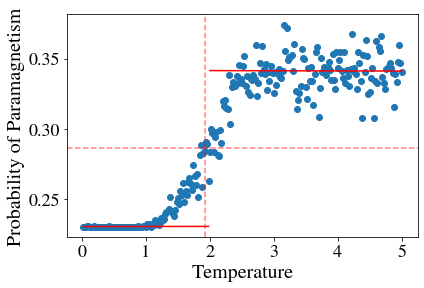

In [62]:
plt.scatter(temperature, para)

# Plot the first segment fit
plt.plot(temperature[:(np.where(temperature == 2)[0][0])], 
         linear_function(temperature[:(np.where(temperature == 2)[0][0])], *popt_first), color='red', label='First Segment Fit (Temp=1)')

# Plot the last segment fit
plt.plot(temperature[(np.where(temperature == 2)[0][0]):], 
         linear_function(temperature[(np.where(temperature == 2)[0][0]):], *popt_last), color='red', label='Last Segment Fit')

plt.axhline(y=half_of_height, color = 'red', linestyle = '--', alpha = 0.5)

plt.axvline(x=closest_x, color = 'red', linestyle = '--', alpha = 0.5)

plt.xlabel('Temperature')
plt.ylabel('Probability of Paramagnetism')

plt.show()

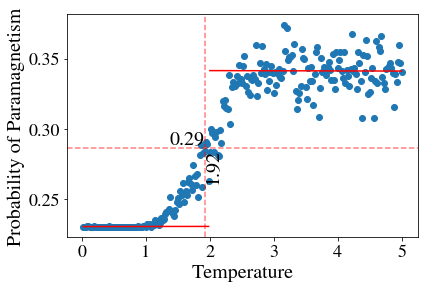

In [63]:
plt.scatter(temperature, para)

# Plot the first segment fit
plt.plot(temperature[:(np.where(temperature == 2)[0][0])], 
         linear_function(temperature[:(np.where(temperature == 2)[0][0])], *popt_first), color='red', label='First fit')

# Plot the last segment fit
plt.plot(temperature[(np.where(temperature == 2)[0][0]):], 
         linear_function(temperature[(np.where(temperature == 2)[0][0]):], *popt_last), color='red', label='Last fit')

# Add horizontal and vertical lines
plt.axhline(y=half_of_height, color='red', linestyle='--', alpha=0.5)
plt.axvline(x=closest_x, color='red', linestyle='--', alpha=0.5)

# Display the value of half_of_height on the y-axis
plt.text(closest_x, half_of_height, f'{half_of_height:.2f}', color='black', 
        verticalalignment='bottom', horizontalalignment='right', fontsize=20)
plt.text(closest_x, half_of_height, f'{closest_x:.2f}', color='black', 
        verticalalignment='top', horizontalalignment='left', rotation=90, fontsize=20)

# Add labels and legend
plt.xlabel('Temperature')
plt.ylabel('Probability of Paramagnetism')

# Adjust legend position
#plt.legend(loc='upper left')  # Change the location as needed

# Show the plot
plt.show()


# Critical temperature per prediction

Lower bound: 0.23045453119447548
Higher bound: 0.3416399303588701
Half of height: 0.28604723077667277
Critical temperature: 1.92
Lower bound: 0.31593685949890343
Higher bound: 0.22043377550907628
Half of height: 0.2681853175039899
Critical temperature: 1.86
Lower bound: 0.13489516290340053
Higher bound: 0.2114827519171424
Half of height: 0.17318895741027146
Critical temperature: 1.94
Lower bound: 0.3187130875616688
Higher bound: 0.2264429943665408
Half of height: 0.27257804096410476
Critical temperature: 2.18


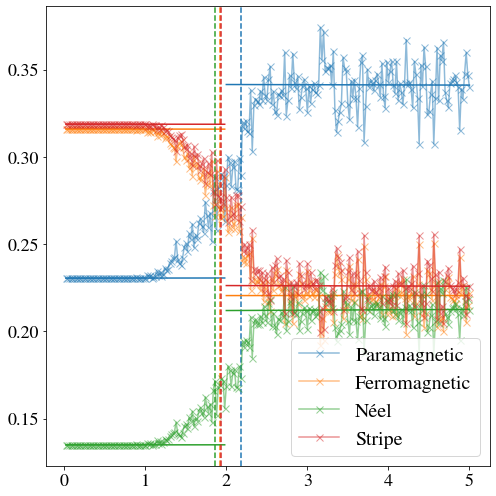

In [84]:
prediction = pd.read_csv(resultsfolder+f'/predictions_1.csv', header=0).to_numpy(float)

temperature, para, ferro, neel, stripe = prediction[1:].T

def linear_function(x, a, b):
    return a*x + b

index_temp_1 = np.where(temperature == 1)[0][0]

index_temp_3 = np.where(temperature == 3)[0][0]

linear_fitting = []
tc = []

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

plt.figure(figsize=(7, 7))

names = ['Paramagnetic', 'Ferromagnetic', 'Néel', 'Stripe']

for index, feature in enumerate([para, ferro, neel, stripe]):
    color = colors[index]
    
    plt.plot(temperature, feature, 'x-', markerfacecolor=None, markersize=7, label = f'{names[index]}', color=color, alpha=0.5)

    popt_first, pcov_first = curve_fit(linear_function, temperature[:index_temp_1+1], feature[:index_temp_1+1])
    popt_last, pcov_last = curve_fit(linear_function, temperature[index_temp_3:], feature[index_temp_3:])

    plt.plot(temperature[:(np.where(temperature == 2)[0][0])], 
         linear_function(temperature[:(np.where(temperature == 2)[0][0])], *popt_first), color=color)

    plt.plot(temperature[(np.where(temperature == 2)[0][0]):], 
         linear_function(temperature[(np.where(temperature == 2)[0][0]):], *popt_last), color=color)
    plt.axvline(x=closest_x, color = color, linestyle = '--')
    
    print(f'Lower bound: {popt_first[1]}')
    print(f'Higher bound: {popt_last[1]}')
    
    half_of_height = (popt_first[1]+popt_last[1])/2
    closest_index = np.abs(feature - half_of_height).argmin()
    closest_x = temperature[closest_index]
    
    print(f'Half of height: {half_of_height}')
    print(f'Critical temperature: {closest_x}')
    linear_fitting.append([popt_first[1], popt_last[1]])
    tc.append(closest_x)
    
plt.legend()
plt.show()

# Doing this for every DNN

In [6]:
def constant_func(x, b):
    return np.full_like(x, b)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

names = ['Paramagnetic', 'Ferromagnetic', 'Néel', 'Stripe']

Prediction for 1 neurons in hidden layer
Lower bound (Paramagnetic): 0.3108633756637573
Higher bound (Paramagnetic): 0.30602926074138415
Half of height (Paramagnetic): 0.30844631820257074
Critical temperature (Paramagnetic): 3.76
Lower bound (Ferromagnetic): 0.3154707252979278
Higher bound (Ferromagnetic): 0.30966994166374207
Half of height (Ferromagnetic): 0.31257033348083496
Critical temperature (Ferromagnetic): 4.64
Lower bound (Néel): 0.235602781176567
Higher bound (Néel): 0.24168450750391224
Half of height (Néel): 0.2386436443402396
Critical temperature (Néel): 3.62
Lower bound (Stripe): 0.1380628645420074
Higher bound (Stripe): 0.1426161223748147
Half of height (Stripe): 0.14033949345841104
Critical temperature (Stripe): 3.8


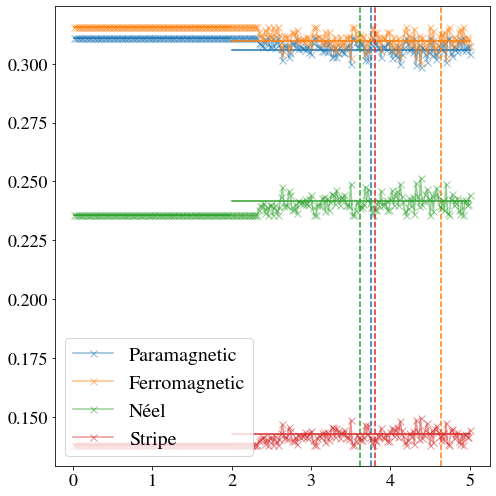

Prediction for 2 neurons in hidden layer
Lower bound (Paramagnetic): 0.1510058492422104
Higher bound (Paramagnetic): 0.3558563490708669
Half of height (Paramagnetic): 0.2534310991565386
Critical temperature (Paramagnetic): 2.54
Lower bound (Ferromagnetic): 0.536283620595932
Higher bound (Ferromagnetic): 0.17981562310395183
Half of height (Ferromagnetic): 0.35804962184994193
Critical temperature (Ferromagnetic): 2.34
Lower bound (Néel): 0.08831546485424038
Higher bound (Néel): 0.2301972745095982
Half of height (Néel): 0.1592563696819193
Critical temperature (Néel): 2.2
Lower bound (Stripe): 0.2243946492671966
Higher bound (Stripe): 0.2341310300079046
Half of height (Stripe): 0.22926283963755062
Critical temperature (Stripe): 4.0600000000000005


<Figure size 432x288 with 0 Axes>

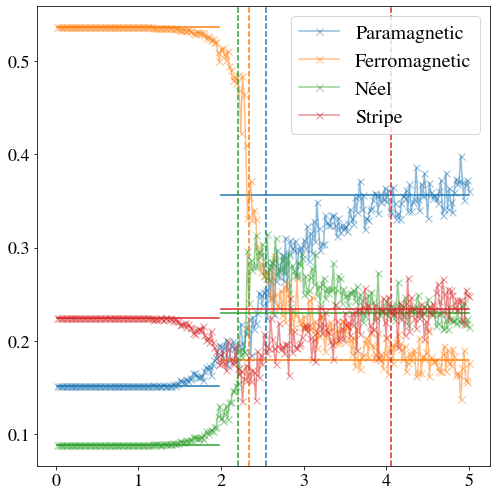

Prediction for 3 neurons in hidden layer
Lower bound (Paramagnetic): 0.0886591076850891
Higher bound (Paramagnetic): 0.47966270060986704
Half of height (Paramagnetic): 0.2841609041474781
Critical temperature (Paramagnetic): 2.28
Lower bound (Ferromagnetic): 0.6595346319675446
Higher bound (Ferromagnetic): 0.15906885675172056
Half of height (Ferromagnetic): 0.40930174435963257
Critical temperature (Ferromagnetic): 2.32
Lower bound (Néel): 0.23763613492250438
Higher bound (Néel): 0.26036141783583394
Half of height (Néel): 0.24899877637916917
Critical temperature (Néel): 4.42
Lower bound (Stripe): 0.0141712184995412
Higher bound (Stripe): 0.10090683575742576
Half of height (Stripe): 0.05753902712848348
Critical temperature (Stripe): 2.28


<Figure size 432x288 with 0 Axes>

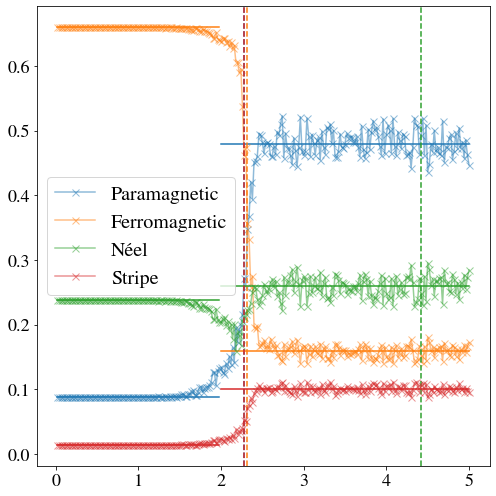

Prediction for 4 neurons in hidden layer
Lower bound (Paramagnetic): 0.12848265975713727
Higher bound (Paramagnetic): 0.4503986969870376
Half of height (Paramagnetic): 0.2894406783720874
Critical temperature (Paramagnetic): 2.1
Lower bound (Ferromagnetic): 0.5179749703396774
Higher bound (Ferromagnetic): 0.2552682012319564
Half of height (Ferromagnetic): 0.38662158578581696
Critical temperature (Ferromagnetic): 2.14
Lower bound (Néel): 0.158441267311573
Higher bound (Néel): 0.20163870237447445
Half of height (Néel): 0.18003998484302372
Critical temperature (Néel): 2.2
Lower bound (Stripe): 0.19510097146034236
Higher bound (Stripe): 0.0926941139421118
Half of height (Stripe): 0.14389754270122707
Critical temperature (Stripe): 2.1


<Figure size 432x288 with 0 Axes>

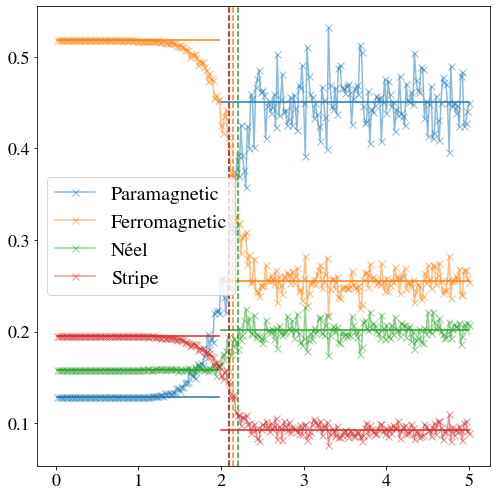

Prediction for 5 neurons in hidden layer
Lower bound (Paramagnetic): 0.060966868100502114
Higher bound (Paramagnetic): 0.5736721181392721
Half of height (Paramagnetic): 0.3173194931198871
Critical temperature (Paramagnetic): 2.2
Lower bound (Ferromagnetic): 0.6391552269450897
Higher bound (Ferromagnetic): 0.16215854386488593
Half of height (Ferromagnetic): 0.40065688540498784
Critical temperature (Ferromagnetic): 2.3000000000000003
Lower bound (Néel): 0.28361847341060636
Higher bound (Néel): 0.20726636198221465
Half of height (Néel): 0.2454424176964105
Critical temperature (Néel): 1.68
Lower bound (Stripe): 0.016259269490838
Higher bound (Stripe): 0.05690302458550389
Half of height (Stripe): 0.03658114703817095
Critical temperature (Stripe): 2.18


<Figure size 432x288 with 0 Axes>

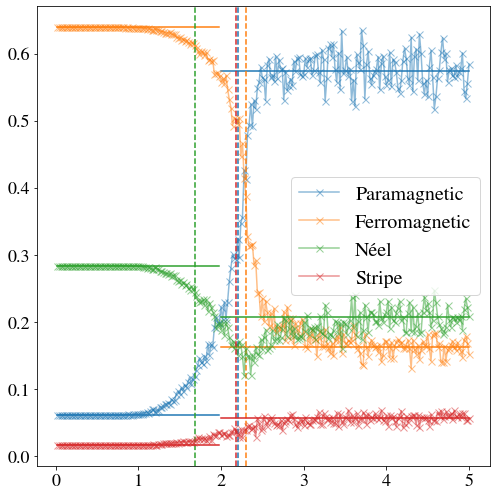

Prediction for 6 neurons in hidden layer
Lower bound (Paramagnetic): 0.000362105662352356
Higher bound (Paramagnetic): 0.5653563854731636
Half of height (Paramagnetic): 0.282859245567758
Critical temperature (Paramagnetic): 2.4
Lower bound (Ferromagnetic): 0.9653572189807892
Higher bound (Ferromagnetic): 0.11779705624761938
Half of height (Ferromagnetic): 0.5415771376142042
Critical temperature (Ferromagnetic): 2.36
Lower bound (Néel): 0.0342448584735393
Higher bound (Néel): 0.1238486852989068
Half of height (Néel): 0.07904677188622306
Critical temperature (Néel): 2.22
Lower bound (Stripe): 3.5170473420294005e-05
Higher bound (Stripe): 0.19299791928423837
Half of height (Stripe): 0.09651654487882934
Critical temperature (Stripe): 2.38


<Figure size 432x288 with 0 Axes>

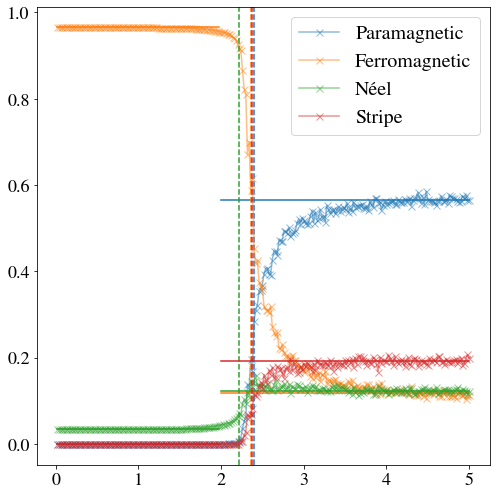

Prediction for 7 neurons in hidden layer
Lower bound (Paramagnetic): 0.01163056397810574
Higher bound (Paramagnetic): 0.6648450213312804
Half of height (Paramagnetic): 0.33823779265469306
Critical temperature (Paramagnetic): 2.34
Lower bound (Ferromagnetic): 0.9780320608615396
Higher bound (Ferromagnetic): 0.15477744387645345
Half of height (Ferromagnetic): 0.5664047523689966
Critical temperature (Ferromagnetic): 2.34
Lower bound (Néel): 0.002891090800985652
Higher bound (Néel): 0.17213159361125785
Half of height (Néel): 0.08751134220612175
Critical temperature (Néel): 2.32
Lower bound (Stripe): 0.007446818947792002
Higher bound (Stripe): 0.00824604453485267
Half of height (Stripe): 0.007846431741322336
Critical temperature (Stripe): 2.66


<Figure size 432x288 with 0 Axes>

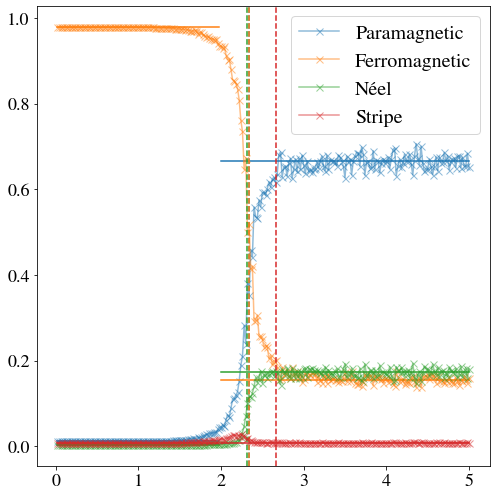

Prediction for 8 neurons in hidden layer
Lower bound (Paramagnetic): 0.00701579062268133
Higher bound (Paramagnetic): 0.6622993478580664
Half of height (Paramagnetic): 0.3346575692403739
Critical temperature (Paramagnetic): 2.34
Lower bound (Ferromagnetic): 0.9929745507240142
Higher bound (Ferromagnetic): 0.13761009378176106
Half of height (Ferromagnetic): 0.5652923222528876
Critical temperature (Ferromagnetic): 2.38
Lower bound (Néel): 1.0335553714642689e-11
Higher bound (Néel): 0.10643849697183157
Half of height (Néel): 0.05321924849108356
Critical temperature (Néel): 2.54
Lower bound (Stripe): 1.0283451447321576e-05
Higher bound (Stripe): 0.09365206255632284
Half of height (Stripe): 0.046831173003885083
Critical temperature (Stripe): 2.44


<Figure size 432x288 with 0 Axes>

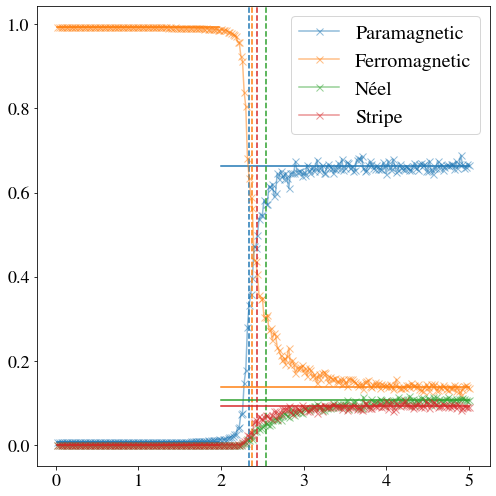

Prediction for 9 neurons in hidden layer
Lower bound (Paramagnetic): 6.3987704652390695e-06
Higher bound (Paramagnetic): 0.6581181100770539
Half of height (Paramagnetic): 0.3290622544237596
Critical temperature (Paramagnetic): 2.4
Lower bound (Ferromagnetic): 0.9999937605857849
Higher bound (Ferromagnetic): 0.10512403559451006
Half of height (Ferromagnetic): 0.5525588980901475
Critical temperature (Ferromagnetic): 2.4
Lower bound (Néel): 1.5321667095760856e-11
Higher bound (Néel): 0.10562562591694236
Half of height (Néel): 0.05281281296613201
Critical temperature (Néel): 2.56
Lower bound (Stripe): 6.882491838666743e-09
Higher bound (Stripe): 0.13113224345679372
Half of height (Stripe): 0.06556612516964277
Critical temperature (Stripe): 2.44


<Figure size 432x288 with 0 Axes>

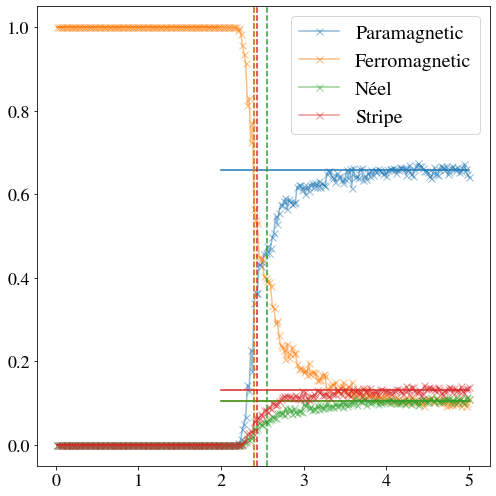

Prediction for 10 neurons in hidden layer
Lower bound (Paramagnetic): 0.1663289189320497
Higher bound (Paramagnetic): 0.8904364681711384
Half of height (Paramagnetic): 0.5283826935515941
Critical temperature (Paramagnetic): 2.4
Lower bound (Ferromagnetic): 0.752085978984292
Higher bound (Ferromagnetic): 0.08128779323077664
Half of height (Ferromagnetic): 0.4166868861075343
Critical temperature (Ferromagnetic): 2.4
Lower bound (Néel): 0.005687189828604408
Higher bound (Néel): 0.0037342967082033647
Half of height (Néel): 0.004710743268403886
Critical temperature (Néel): 2.36
Lower bound (Stripe): 0.07589725166559215
Higher bound (Stripe): 0.024541454971922616
Half of height (Stripe): 0.05021935331875738
Critical temperature (Stripe): 2.4


<Figure size 432x288 with 0 Axes>

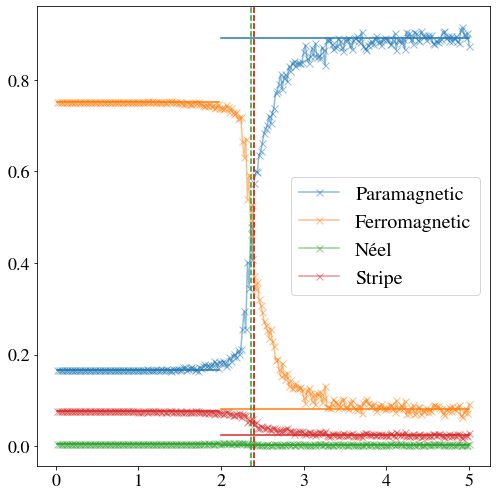

Prediction for 20 neurons in hidden layer
Lower bound (Paramagnetic): 6.691280132145031e-06
Higher bound (Paramagnetic): 0.7952033830624
Half of height (Paramagnetic): 0.3976050371712661
Critical temperature (Paramagnetic): 2.4
Lower bound (Ferromagnetic): 0.9999931049346924
Higher bound (Ferromagnetic): 0.07775753882585783
Half of height (Ferromagnetic): 0.5388753218802751
Critical temperature (Ferromagnetic): 2.4
Lower bound (Néel): 1.981931351480171e-08
Higher bound (Néel): 0.05273114254369451
Half of height (Néel): 0.026365581181504012
Critical temperature (Néel): 2.44
Lower bound (Stripe): 4.2225351933211015e-07
Higher bound (Stripe): 0.07430791445604956
Half of height (Stripe): 0.037154168354784446
Critical temperature (Stripe): 2.4


<Figure size 432x288 with 0 Axes>

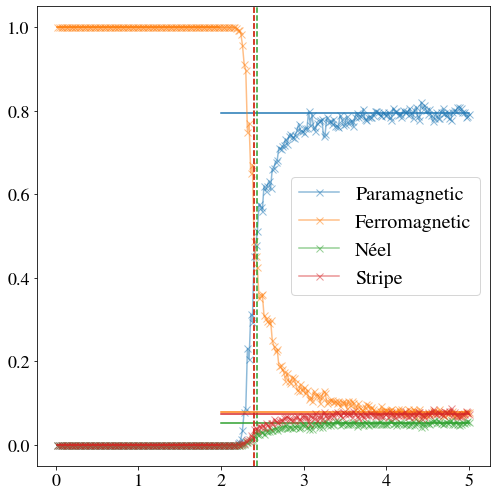

Prediction for 40 neurons in hidden layer
Lower bound (Paramagnetic): 5.812954157136056e-07
Higher bound (Paramagnetic): 0.8679082393643358
Half of height (Paramagnetic): 0.43395441032987575
Critical temperature (Paramagnetic): 2.4
Lower bound (Ferromagnetic): 0.9999986279010773
Higher bound (Ferromagnetic): 0.05716775868831914
Half of height (Ferromagnetic): 0.5285831932946983
Critical temperature (Ferromagnetic): 2.4
Lower bound (Néel): 1.5426755606239353e-09
Higher bound (Néel): 0.032264984849847744
Half of height (Néel): 0.016132493196261654
Critical temperature (Néel): 2.46
Lower bound (Stripe): 3.210507232287488e-10
Higher bound (Stripe): 0.04265901007864148
Half of height (Stripe): 0.0213295051998461
Critical temperature (Stripe): 2.6


<Figure size 432x288 with 0 Axes>

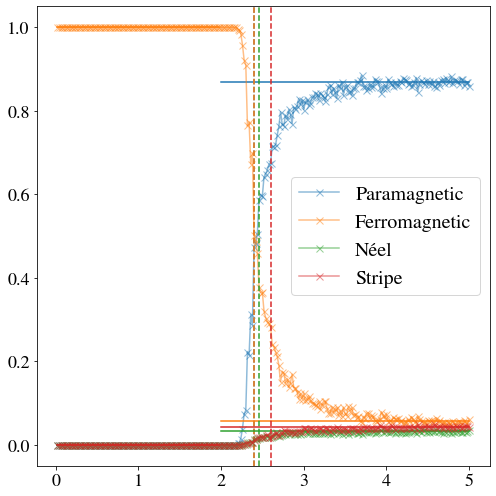

Prediction for 60 neurons in hidden layer
Lower bound (Paramagnetic): 5.5668243585387256e-05
Higher bound (Paramagnetic): 0.9013979072664299
Half of height (Paramagnetic): 0.45072678775500763
Critical temperature (Paramagnetic): 2.34
Lower bound (Ferromagnetic): 0.9999417686462401
Higher bound (Ferromagnetic): 0.035172911835651716
Half of height (Ferromagnetic): 0.5175573402409459
Critical temperature (Ferromagnetic): 2.34
Lower bound (Néel): 1.635293801882648e-06
Higher bound (Néel): 0.02507209668052024
Half of height (Néel): 0.01253686598716106
Critical temperature (Néel): 2.38
Lower bound (Stripe): 1.260379044651928e-06
Higher bound (Stripe): 0.03835710364311995
Half of height (Stripe): 0.0191791820110823
Critical temperature (Stripe): 2.4


<Figure size 432x288 with 0 Axes>

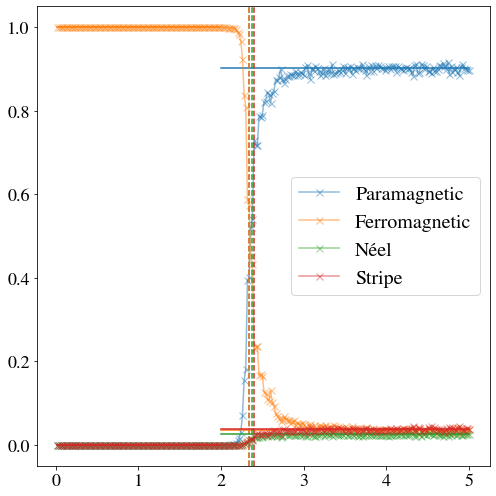

Prediction for 80 neurons in hidden layer
Lower bound (Paramagnetic): 1.0189058031073729e-07
Higher bound (Paramagnetic): 0.8856798410415649
Half of height (Paramagnetic): 0.4428399714660726
Critical temperature (Paramagnetic): 2.4
Lower bound (Ferromagnetic): 0.9999987483024596
Higher bound (Ferromagnetic): 0.052835305968023105
Half of height (Ferromagnetic): 0.5264170271352413
Critical temperature (Ferromagnetic): 2.4
Lower bound (Néel): 5.376207069970148e-11
Higher bound (Néel): 0.023294162991292285
Half of height (Néel): 0.011647081522527178
Critical temperature (Néel): 2.58
Lower bound (Stripe): 4.162631778159612e-10
Higher bound (Stripe): 0.03819069010662092
Half of height (Stripe): 0.019095345261442048
Critical temperature (Stripe): 2.58


<Figure size 432x288 with 0 Axes>

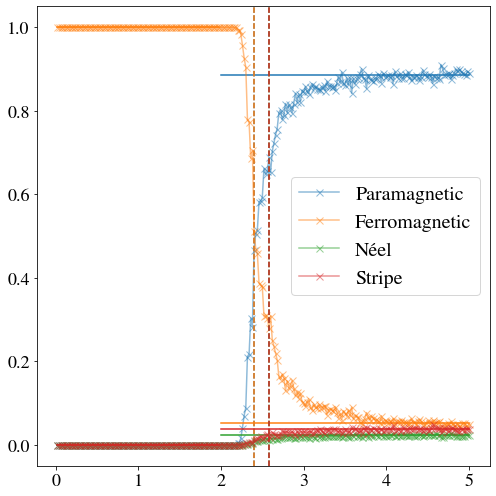

Prediction for 100 neurons in hidden layer
Lower bound (Paramagnetic): 0.000101829501072598
Higher bound (Paramagnetic): 0.8984812813644439
Half of height (Paramagnetic): 0.4492915554327583
Critical temperature (Paramagnetic): 2.34
Lower bound (Ferromagnetic): 0.9998648190498349
Higher bound (Ferromagnetic): 0.029416770909566514
Half of height (Ferromagnetic): 0.5146407949797007
Critical temperature (Ferromagnetic): 2.34
Lower bound (Néel): 5.279643573885426e-07
Higher bound (Néel): 0.03158821709534987
Half of height (Néel): 0.015794372529853627
Critical temperature (Néel): 2.4
Lower bound (Stripe): 3.2353279166272855e-05
Higher bound (Stripe): 0.04051374658440732
Half of height (Stripe): 0.020273049931786795
Critical temperature (Stripe): 2.36


<Figure size 432x288 with 0 Axes>

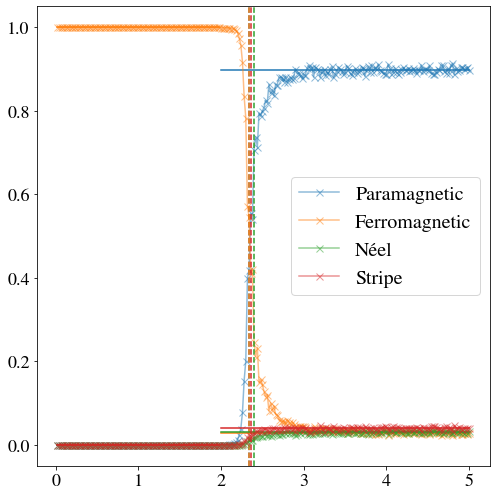

Prediction for 150 neurons in hidden layer
Lower bound (Paramagnetic): 6.749738431608418e-06
Higher bound (Paramagnetic): 0.9620266907354537
Half of height (Paramagnetic): 0.48101672023694264
Critical temperature (Paramagnetic): 2.38
Lower bound (Ferromagnetic): 0.9999922311306
Higher bound (Ferromagnetic): 0.011503269375466203
Half of height (Ferromagnetic): 0.5057477502530331
Critical temperature (Ferromagnetic): 2.38
Lower bound (Néel): 1.240469600816129e-06
Higher bound (Néel): 0.017961232592126786
Half of height (Néel): 0.008981236530863801
Critical temperature (Néel): 2.38
Lower bound (Stripe): 1.9805150124329027e-08
Higher bound (Stripe): 0.008508841733239625
Half of height (Stripe): 0.0042544307691948745
Critical temperature (Stripe): 2.48


<Figure size 432x288 with 0 Axes>

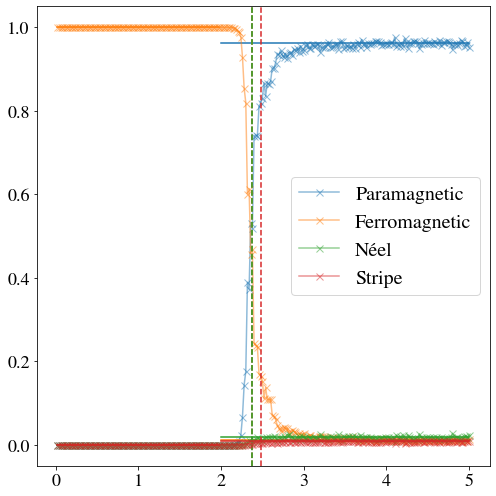

Prediction for 200 neurons in hidden layer
Lower bound (Paramagnetic): 0.000837444375501902
Higher bound (Paramagnetic): 0.9241672485480805
Half of height (Paramagnetic): 0.4625023464617912
Critical temperature (Paramagnetic): 2.34
Lower bound (Ferromagnetic): 0.9990009415149667
Higher bound (Ferromagnetic): 0.02040931016139136
Half of height (Ferromagnetic): 0.5097051258381791
Critical temperature (Ferromagnetic): 2.32
Lower bound (Néel): 0.000153790210315444
Higher bound (Néel): 0.0207792932109766
Half of height (Néel): 0.010466541710646022
Critical temperature (Néel): 2.3000000000000003
Lower bound (Stripe): 7.860049936425647e-06
Higher bound (Stripe): 0.034644153295718016
Half of height (Stripe): 0.017326006672827222
Critical temperature (Stripe): 2.46


<Figure size 432x288 with 0 Axes>

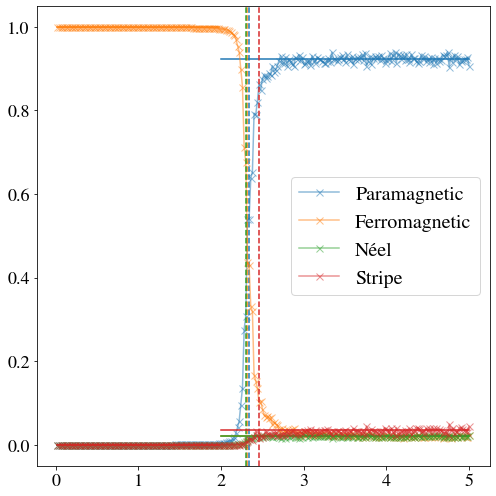

Prediction for 250 neurons in hidden layer
Lower bound (Paramagnetic): 6.326708462438545e-05
Higher bound (Paramagnetic): 0.995854097254127
Half of height (Paramagnetic): 0.49795868216937567
Critical temperature (Paramagnetic): 2.34
Lower bound (Ferromagnetic): 0.9999310648441313
Higher bound (Ferromagnetic): 0.0010508286079628784
Half of height (Ferromagnetic): 0.5004909467260471
Critical temperature (Ferromagnetic): 2.32
Lower bound (Néel): 8.671343053378854e-08
Higher bound (Néel): 0.0007425416603355236
Half of height (Néel): 0.00037131418688302867
Critical temperature (Néel): 2.3000000000000003
Lower bound (Stripe): 4.3792556971311455e-06
Higher bound (Stripe): 0.0023525558463356466
Half of height (Stripe): 0.0011784675510163889
Critical temperature (Stripe): 2.26


<Figure size 432x288 with 0 Axes>

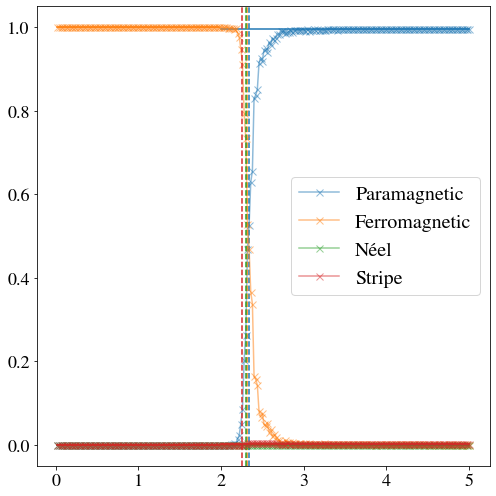

Prediction for 300 neurons in hidden layer
Lower bound (Paramagnetic): 0.000481772295315702
Higher bound (Paramagnetic): 0.99428557064019
Half of height (Paramagnetic): 0.4973836714677528
Critical temperature (Paramagnetic): 2.32
Lower bound (Ferromagnetic): 0.99951268672943
Higher bound (Ferromagnetic): 0.0022066450568244233
Half of height (Ferromagnetic): 0.5008596658931272
Critical temperature (Ferromagnetic): 2.32
Lower bound (Néel): 2.77537686542928e-06
Higher bound (Néel): 0.0016406879865326588
Half of height (Néel): 0.000821731681699044
Critical temperature (Néel): 2.28
Lower bound (Stripe): 4.073854570378903e-06
Higher bound (Stripe): 0.0018670897309978236
Half of height (Stripe): 0.0009355817927841013
Critical temperature (Stripe): 2.3000000000000003


<Figure size 432x288 with 0 Axes>

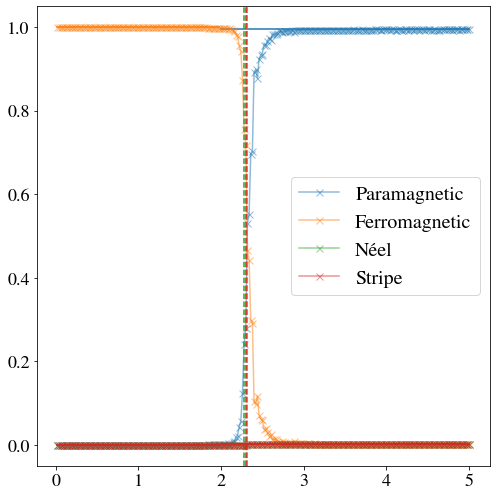

Prediction for 350 neurons in hidden layer
Lower bound (Paramagnetic): 0.000390961015364106
Higher bound (Paramagnetic): 0.9904184142748306
Half of height (Paramagnetic): 0.4954046876450973
Critical temperature (Paramagnetic): 2.32
Lower bound (Ferromagnetic): 0.9995468366146077
Higher bound (Ferromagnetic): 0.00311302109951872
Half of height (Ferromagnetic): 0.5013299288570632
Critical temperature (Ferromagnetic): 2.32
Lower bound (Néel): 1.0906584666372512e-05
Higher bound (Néel): 0.002235308262136004
Half of height (Néel): 0.0011231074234011882
Critical temperature (Néel): 2.28
Lower bound (Stripe): 5.154547856363934e-05
Higher bound (Stripe): 0.004233226125292865
Half of height (Stripe): 0.0021423858019282522
Critical temperature (Stripe): 2.26


<Figure size 432x288 with 0 Axes>

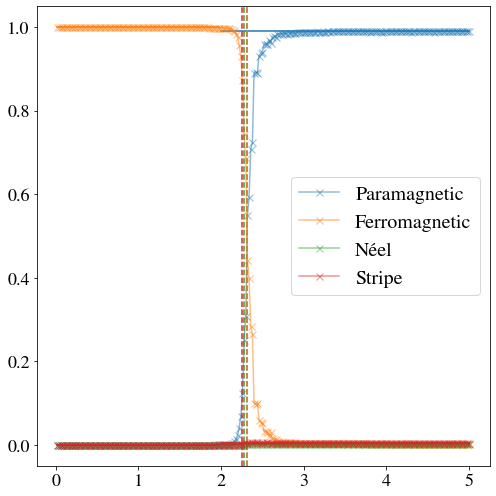

Prediction for 400 neurons in hidden layer
Lower bound (Paramagnetic): 0.000550632538506712
Higher bound (Paramagnetic): 0.9810705453741371
Half of height (Paramagnetic): 0.4908105889563219
Critical temperature (Paramagnetic): 2.3000000000000003
Lower bound (Ferromagnetic): 0.9993957090377807
Higher bound (Ferromagnetic): 0.0038463395459795713
Half of height (Ferromagnetic): 0.5016210242918802
Critical temperature (Ferromagnetic): 2.3000000000000003
Lower bound (Néel): 3.5357254382688546e-05
Higher bound (Néel): 0.0031567457722044834
Half of height (Néel): 0.001596051513293586
Critical temperature (Néel): 2.28
Lower bound (Stripe): 1.8091951933456598e-05
Higher bound (Stripe): 0.011926397215574935
Half of height (Stripe): 0.005972244583754196
Critical temperature (Stripe): 4.18


<Figure size 432x288 with 0 Axes>

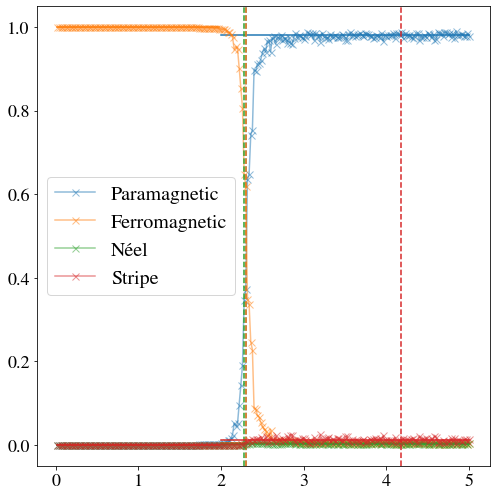

Prediction for 450 neurons in hidden layer
Lower bound (Paramagnetic): 0.000165912483062076
Higher bound (Paramagnetic): 0.9948992331822601
Half of height (Paramagnetic): 0.4975325728326611
Critical temperature (Paramagnetic): 2.32
Lower bound (Ferromagnetic): 0.9997809708118435
Higher bound (Ferromagnetic): 0.002013595987056496
Half of height (Ferromagnetic): 0.5008972833994499
Critical temperature (Ferromagnetic): 2.32
Lower bound (Néel): 4.940313017868903e-05
Higher bound (Néel): 0.0013345076574706079
Half of height (Néel): 0.0006919553938246484
Critical temperature (Néel): 2.2
Lower bound (Stripe): 4.715342065537685e-06
Higher bound (Stripe): 0.0017526650358465764
Half of height (Stripe): 0.0008786901889560571
Critical temperature (Stripe): 2.28


<Figure size 432x288 with 0 Axes>

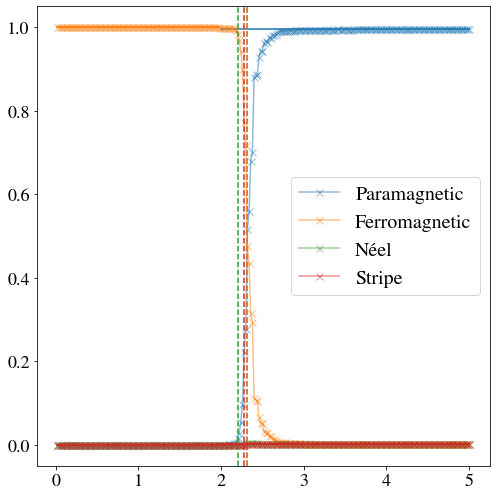

Prediction for 500 neurons in hidden layer
Lower bound (Paramagnetic): 0.000697991737397342
Higher bound (Paramagnetic): 0.9957393828560324
Half of height (Paramagnetic): 0.49821868729671487
Critical temperature (Paramagnetic): 2.3000000000000003
Lower bound (Ferromagnetic): 0.9990796601772288
Higher bound (Ferromagnetic): 0.0011684103302803117
Half of height (Ferromagnetic): 0.5001240352537546
Critical temperature (Ferromagnetic): 2.3000000000000003
Lower bound (Néel): 1.566835744597484e-05
Higher bound (Néel): 0.000565493940467
Half of height (Néel): 0.00029058114895648743
Critical temperature (Néel): 2.22
Lower bound (Stripe): 0.00020603083801684
Higher bound (Stripe): 0.002526680715199445
Half of height (Stripe): 0.0013663557766081425
Critical temperature (Stripe): 2.16


<Figure size 432x288 with 0 Axes>

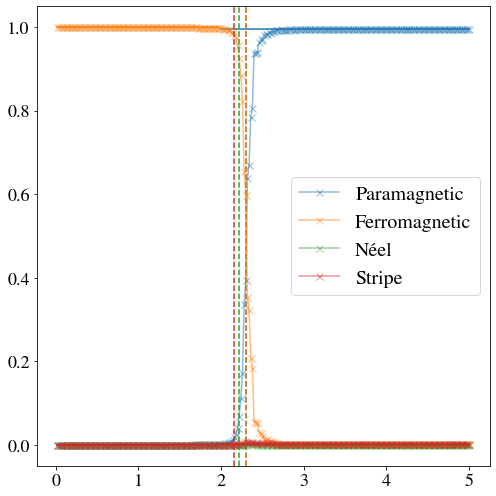

Prediction for 550 neurons in hidden layer
Lower bound (Paramagnetic): 0.000460035335854574
Higher bound (Paramagnetic): 0.9912532287485268
Half of height (Paramagnetic): 0.4958566320421907
Critical temperature (Paramagnetic): 2.32
Lower bound (Ferromagnetic): 0.9995080971717824
Higher bound (Ferromagnetic): 0.0018724749211732764
Half of height (Ferromagnetic): 0.5006902860464778
Critical temperature (Ferromagnetic): 2.32
Lower bound (Néel): 2.2331323316393573e-06
Higher bound (Néel): 0.001611917747604596
Half of height (Néel): 0.0008070754399681177
Critical temperature (Néel): 2.3000000000000003
Lower bound (Stripe): 3.136076113150922e-05
Higher bound (Stripe): 0.005262366066887635
Half of height (Stripe): 0.0026468634140095725
Critical temperature (Stripe): 2.26


<Figure size 432x288 with 0 Axes>

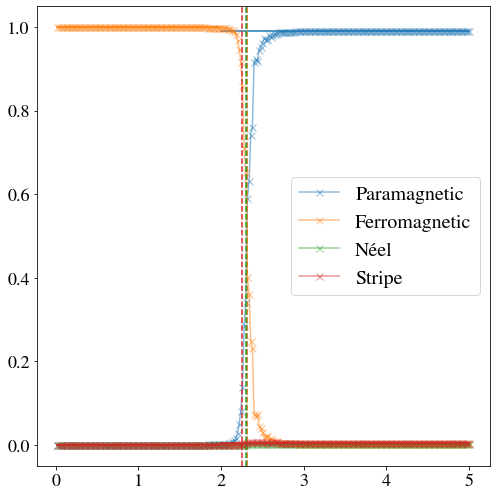

Prediction for 600 neurons in hidden layer
Lower bound (Paramagnetic): 0.001346989315934428
Higher bound (Paramagnetic): 0.992884801883308
Half of height (Paramagnetic): 0.4971158955996212
Critical temperature (Paramagnetic): 2.3000000000000003
Lower bound (Ferromagnetic): 0.9985550212860107
Higher bound (Ferromagnetic): 0.0018929489043668548
Half of height (Ferromagnetic): 0.5002239850951887
Critical temperature (Ferromagnetic): 2.3000000000000003
Lower bound (Néel): 1.2931147939525544e-05
Higher bound (Néel): 0.0013561643290278215
Half of height (Néel): 0.0006845477384836735
Critical temperature (Néel): 2.26
Lower bound (Stripe): 8.497751463437453e-05
Higher bound (Stripe): 0.0038661008870741753
Half of height (Stripe): 0.0019755392008542747
Critical temperature (Stripe): 2.24


<Figure size 432x288 with 0 Axes>

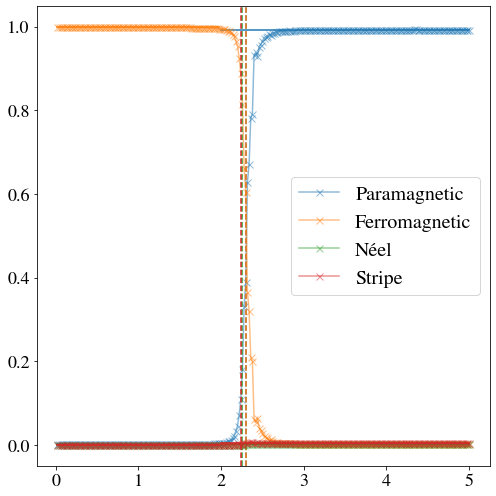

Prediction for 650 neurons in hidden layer
Lower bound (Paramagnetic): 0.000795114650390994
Higher bound (Paramagnetic): 0.9548525144071155
Half of height (Paramagnetic): 0.4778238145287532
Critical temperature (Paramagnetic): 2.3000000000000003
Lower bound (Ferromagnetic): 0.9991783952713013
Higher bound (Ferromagnetic): 0.006898167522685683
Half of height (Ferromagnetic): 0.5030382813969935
Critical temperature (Ferromagnetic): 2.3000000000000003
Lower bound (Néel): 2.6226719592159573e-06
Higher bound (Néel): 0.008918278567565947
Half of height (Néel): 0.004460450619762582
Critical temperature (Néel): 2.34
Lower bound (Stripe): 2.2888705607329034e-05
Higher bound (Stripe): 0.02933104763362726
Half of height (Stripe): 0.014676968169617294
Critical temperature (Stripe): 3.16


<Figure size 432x288 with 0 Axes>

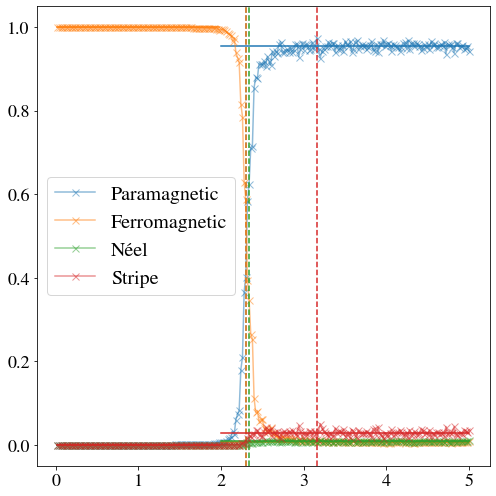

Prediction for 700 neurons in hidden layer
Lower bound (Paramagnetic): 0.00099150155903766
Higher bound (Paramagnetic): 0.9933328523355226
Half of height (Paramagnetic): 0.49716217694728015
Critical temperature (Paramagnetic): 2.32
Lower bound (Ferromagnetic): 0.9988247847557042
Higher bound (Ferromagnetic): 0.0020417454332916254
Half of height (Ferromagnetic): 0.5004332650944979
Critical temperature (Ferromagnetic): 2.3000000000000003
Lower bound (Néel): 6.766609076294117e-05
Higher bound (Néel): 0.0018654920448384295
Half of height (Néel): 0.0009665790678006853
Critical temperature (Néel): 2.22
Lower bound (Stripe): 0.00011569359441632
Higher bound (Stripe): 0.00275991962966961
Half of height (Stripe): 0.001437806612042965
Critical temperature (Stripe): 2.22


<Figure size 432x288 with 0 Axes>

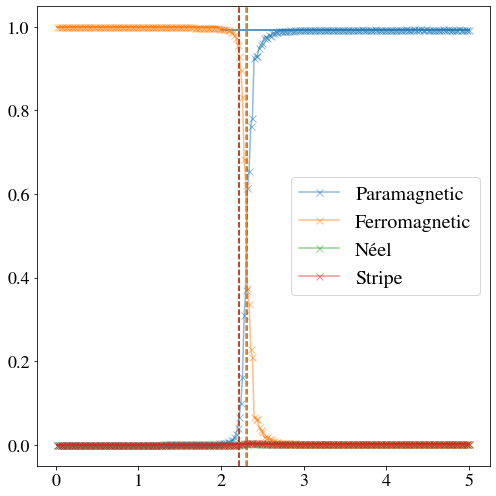

Prediction for 750 neurons in hidden layer
Lower bound (Paramagnetic): 0.001998612186871428
Higher bound (Paramagnetic): 0.9777657424702364
Half of height (Paramagnetic): 0.48988217732855394
Critical temperature (Paramagnetic): 2.3000000000000003
Lower bound (Ferromagnetic): 0.9979541289806366
Higher bound (Ferromagnetic): 0.005807725336132941
Half of height (Ferromagnetic): 0.5018809271583848
Critical temperature (Ferromagnetic): 2.3000000000000003
Lower bound (Néel): 2.500934002455324e-05
Higher bound (Néel): 0.005208643892889467
Half of height (Néel): 0.00261682661645701
Critical temperature (Néel): 2.3000000000000003
Lower bound (Stripe): 2.333671218366362e-05
Higher bound (Stripe): 0.011217910374238915
Half of height (Stripe): 0.005620623543211289
Critical temperature (Stripe): 2.32


<Figure size 432x288 with 0 Axes>

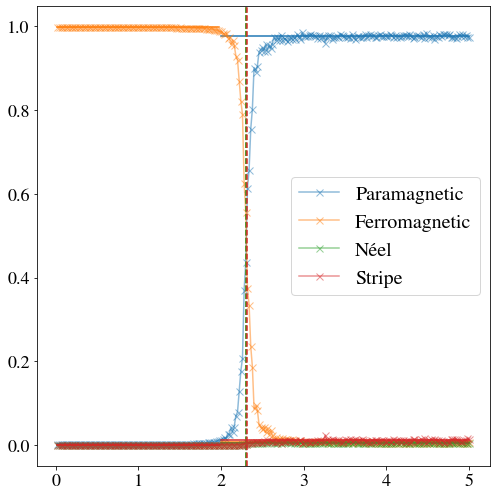

Prediction for 800 neurons in hidden layer
Lower bound (Paramagnetic): 0.001359959940891658
Higher bound (Paramagnetic): 0.9855016505016684
Half of height (Paramagnetic): 0.49343080522128
Critical temperature (Paramagnetic): 2.3000000000000003
Lower bound (Ferromagnetic): 0.9986189222335785
Higher bound (Ferromagnetic): 0.004643490506043865
Half of height (Ferromagnetic): 0.5016312063698112
Critical temperature (Ferromagnetic): 2.3000000000000003
Lower bound (Néel): 9.654127075009566e-07
Higher bound (Néel): 0.0036876701075290175
Half of height (Néel): 0.0018443177601182592
Critical temperature (Néel): 3.64
Lower bound (Stripe): 2.0060326787643127e-05
Higher bound (Stripe): 0.006167195561712302
Half of height (Stripe): 0.0030936279442499728
Critical temperature (Stripe): 2.36


<Figure size 432x288 with 0 Axes>

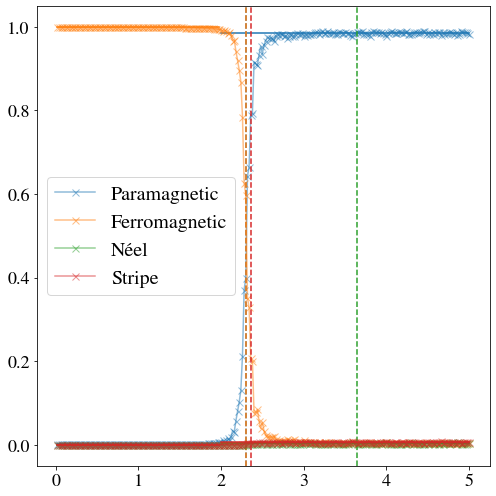

Prediction for 850 neurons in hidden layer
Lower bound (Paramagnetic): 0.00263944191858168
Higher bound (Paramagnetic): 0.9963693233097222
Half of height (Paramagnetic): 0.4995043826141519
Critical temperature (Paramagnetic): 2.3000000000000003
Lower bound (Ferromagnetic): 0.9972201299667298
Higher bound (Ferromagnetic): 0.0006947945849056451
Half of height (Ferromagnetic): 0.4989574622758177
Critical temperature (Ferromagnetic): 2.3000000000000003
Lower bound (Néel): 6.962976101477367e-08
Higher bound (Néel): 7.747899051573006e-05
Half of height (Néel): 3.877431013837241e-05
Critical temperature (Néel): 2.3000000000000003
Lower bound (Stripe): 0.000140949392225542
Higher bound (Stripe): 0.0028583991602590952
Half of height (Stripe): 0.0014996742762423186
Critical temperature (Stripe): 2.2


<Figure size 432x288 with 0 Axes>

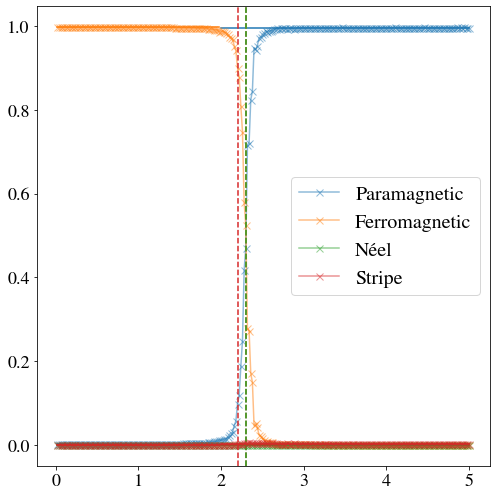

Prediction for 900 neurons in hidden layer
Lower bound (Paramagnetic): 0.002515154802240388
Higher bound (Paramagnetic): 0.9769569647077918
Half of height (Paramagnetic): 0.4897360597550161
Critical temperature (Paramagnetic): 2.3000000000000003
Lower bound (Ferromagnetic): 0.9974329495429937
Higher bound (Ferromagnetic): 0.003609127043307847
Half of height (Ferromagnetic): 0.5005210382931508
Critical temperature (Ferromagnetic): 2.3000000000000003
Lower bound (Néel): 5.251164293440525e-05
Higher bound (Néel): 0.004969253761730305
Half of height (Néel): 0.0025108827023323553
Critical temperature (Néel): 2.28
Lower bound (Stripe): 8.768378177137518e-07
Higher bound (Stripe): 0.014464636842451473
Half of height (Stripe): 0.007232756840134593
Critical temperature (Stripe): 2.5


<Figure size 432x288 with 0 Axes>

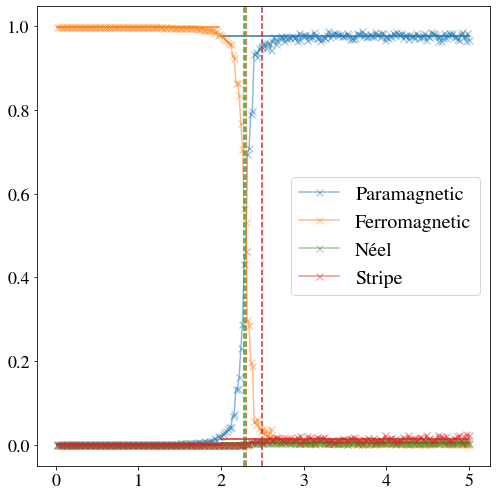

Prediction for 950 neurons in hidden layer
Lower bound (Paramagnetic): 0.000631002066656898
Higher bound (Paramagnetic): 0.9946254772298359
Half of height (Paramagnetic): 0.4976282396482464
Critical temperature (Paramagnetic): 2.3000000000000003
Lower bound (Ferromagnetic): 0.9992817461490631
Higher bound (Ferromagnetic): 0.0017676781954279784
Half of height (Ferromagnetic): 0.5005247121722455
Critical temperature (Ferromagnetic): 2.3000000000000003
Lower bound (Néel): 1.533213198854355e-05
Higher bound (Néel): 0.0010090684963334922
Half of height (Néel): 0.0005122003141610179
Critical temperature (Néel): 2.24
Lower bound (Stripe): 7.266463682753964e-05
Higher bound (Stripe): 0.00259781427973621
Half of height (Stripe): 0.0013352394582818747
Critical temperature (Stripe): 2.22


<Figure size 432x288 with 0 Axes>

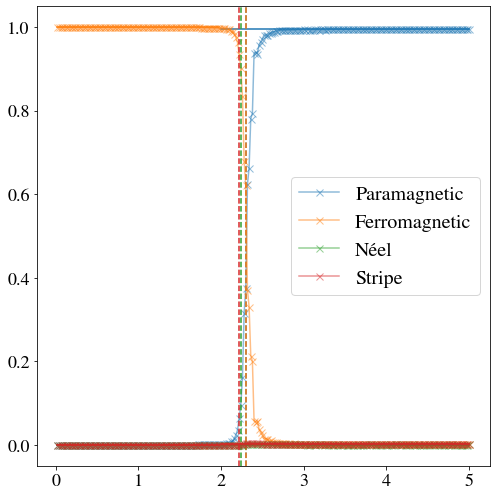

Prediction for 1000 neurons in hidden layer
Lower bound (Paramagnetic): 0.001092134809587102
Higher bound (Paramagnetic): 0.9800150885301477
Half of height (Paramagnetic): 0.49055361166986744
Critical temperature (Paramagnetic): 2.3000000000000003
Lower bound (Ferromagnetic): 0.9988976776599884
Higher bound (Ferromagnetic): 0.007149622298656455
Half of height (Ferromagnetic): 0.5030236499793224
Critical temperature (Ferromagnetic): 2.3000000000000003
Lower bound (Néel): 8.518055165041016e-06
Higher bound (Néel): 0.006214237945409921
Half of height (Néel): 0.003111378000287481
Critical temperature (Néel): 2.32
Lower bound (Stripe): 3.49553138789805e-07
Higher bound (Stripe): 0.006621047231374799
Half of height (Stripe): 0.0033106983922567947
Critical temperature (Stripe): 2.5


<Figure size 432x288 with 0 Axes>

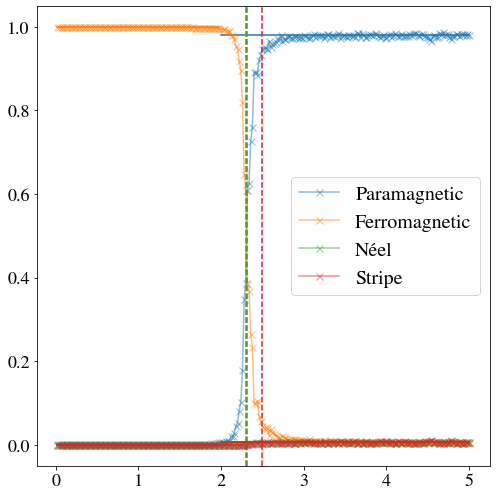

<Figure size 432x288 with 0 Axes>

In [15]:
critical_temperature = []

for neuron in neurons:
	prediction = pd.read_csv(resultsfolder+f'/predictions_{neuron}.csv', header=0).to_numpy(float)
	print(f'Prediction for {neuron} neurons in hidden layer')

	temperature, para, ferro, neel, stripe = prediction[1:].T

	index_temp_1 = np.where(temperature == 1)[0][0]

	index_temp_3 = np.where(temperature == 4)[0][0]
	
	plt.figure(figsize=(7, 7))

	tc = []

	for index, feature in enumerate([para, ferro, neel, stripe]):
		color = colors[index]
		
		plt.plot(temperature, feature, 'x-', markerfacecolor=None, markersize=7, label = f'{names[index]}', color=color, alpha=0.5)

		popt_first, pcov_first = curve_fit(constant_func, temperature[:index_temp_1+1], feature[:index_temp_1+1])
		popt_last, pcov_last = curve_fit(constant_func, temperature[index_temp_3:], feature[index_temp_3:])

		plt.plot(temperature[:(np.where(temperature == 2)[0][0])], 
			constant_func(temperature[:(np.where(temperature == 2)[0][0])], *popt_first), color=color)

		plt.plot(temperature[(np.where(temperature == 2)[0][0]):], 
			constant_func(temperature[(np.where(temperature == 2)[0][0]):], *popt_last), color=color)
		
		print(f'Lower bound ({names[index]}): {popt_first[0]}')
		print(f'Higher bound ({names[index]}): {popt_last[0]}')
		
		half_of_height = (popt_first[0]+popt_last[0])/2
		
		closest_index = np.abs(feature - half_of_height *np.ones_like(feature)).argmin()

		closest_x = temperature[closest_index]

		plt.axvline(x=closest_x, color = color, linestyle = '--')
		
		print(f'Half of height ({names[index]}): {half_of_height}')
		print(f'Critical temperature ({names[index]}): {closest_x}')
		tc.append(closest_x)
		
	plt.legend()
	plt.show()
	plt.savefig(os.path.join(saving_folder, f'critical_temperature_{neuron}.pdf'))

	mean_temperature = np.mean(tc)

	# finding an outlier:
	probably_outlier = np.abs(tc - mean_temperature).max()
	probably_outlier = probably_outlier/np.mean(tc)

	probably_outlier_index = np.abs(tc - mean_temperature).argmax()

	if probably_outlier>0.1:
		tc.remove(tc[probably_outlier_index])

	mean_temperature = np.mean(tc)

	critical_temperature.append(mean_temperature)

In [ ]:
critical_temperature

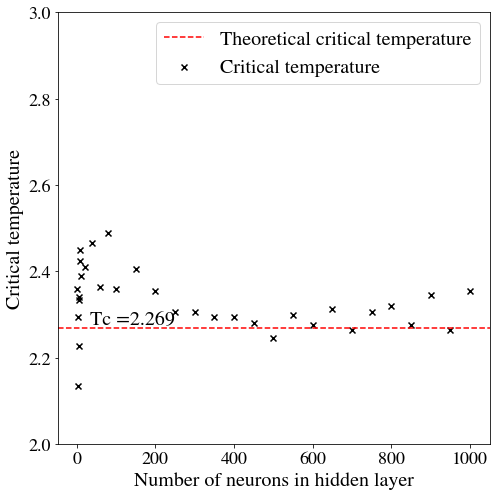

In [16]:
plt.figure(figsize=(7, 7))


plt.scatter(neurons[1:], critical_temperature[1:], marker='x', color='black', label='Critical temperature') # excluding the first neuron
plt.axhline(y=2.269, color = 'red', linestyle = '--', label = 'Theoretical critical temperature')

plt.xlabel('Number of neurons in hidden layer')
plt.ylabel('Critical temperature')

plt.text(250, 2.269, rf'Tc ={2.269}', color='black', 
        verticalalignment='bottom', horizontalalignment='right', fontsize=20)

plt.ylim((2, 3))
plt.legend()
plt.savefig(os.path.join(saving_folder, 'critical_temperature.pdf'))
plt.show()